Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Luka Parisi - Snr:2066677"
COLLABORATORS = "Atma Jyoti Mahapatra - Snr:"

---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Datascience-for-Economics-Final-Assignment" data-toc-modified-id="Datascience-for-Economics-Final-Assignment-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Datascience for Economics Final Assignment</a></span></li><li><span><a href="#Research-question-(0.5-points)" data-toc-modified-id="Research-question-(0.5-points)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Research question (0.5 points)</a></span></li><li><span><a href="#Motivation-(0.5-points)" data-toc-modified-id="Motivation-(0.5-points)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Motivation (0.5 points)</a></span></li><li><span><a href="#Method-and-data-(1.0-point)" data-toc-modified-id="Method-and-data-(1.0-point)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Method and data (1.0 point)</a></span></li><li><span><a href="#Preview-of-the-answers-(0.5-points)" data-toc-modified-id="Preview-of-the-answers-(0.5-points)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Preview of the answers (0.5 points)</a></span></li><li><span><a href="#Main-assumptions-(0.5-points)" data-toc-modified-id="Main-assumptions-(0.5-points)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Main assumptions (0.5 points)</a></span></li><li><span><a href="#Python/R-code-(6-points)" data-toc-modified-id="Python/R-code-(6-points)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Python/R code (6 points)</a></span></li><li><span><a href="#Robustness-analysis-(0.5-points)" data-toc-modified-id="Robustness-analysis-(0.5-points)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Robustness analysis (0.5 points)</a></span></li><li><span><a href="#Discussion-and-conclusion-(0.5-points)" data-toc-modified-id="Discussion-and-conclusion-(0.5-points)-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Discussion and conclusion (0.5 points)</a></span></li></ul></div>

For this problem set, we'll be using the Jupyter notebook:

![](jupyter.png)

# Datascience for Economics Final Assignment

The datascience final assignment you can do either on your own or with one other student (i.e. max group size is 2 students).

The first cell of your notebook, should contain a table with the names and SNRs and ANRs of the group members, like so

|Name|SNR|ANR|
|----|---|----|
|j.m. keynes|12345|u6786|
|adam smith|56789|u1234|


See [the webpage](https://janboone.github.io/msc_datascience/#org6548148) for details of what we expect to see in this assignment.

Write readable python/R code and use markdown to explain to us what you are doing in the code and why.


# Research question (0.5 points)

Formulate the research question: what question do you want to answer in this assignment?

YOUR ANSWER HERE

# Motivation (0.5 points)

Motivate why this question is interesting.

YOUR ANSWER HERE

# Method and data (1.0 point)

Which data do you have to analyze the question and what methods are you using to answer the question?

* explain where your data come from (give a link or the code to download the data if you use an API like [wbdata](https://wbdata.readthedocs.io/en/stable/));
* explain the data cleaning and data normalization steps that you use;
* make sure that the data is in your github repository as well (or explain why this is not possible) so that we can replicate your analysis.
* Motivate why you have decided to use these methods (e.g., neural network) over other methods (e.g., Lasso) in this specific context of your study.
* How is the data representative to the population of interest?

YOUR ANSWER HERE

# Preview of the answers (0.5 points)

Summarize the results that you find and the answer to your research question.

YOUR ANSWER HERE

# Main assumptions (0.5 points)

What are the main assumptions that you need to answer the question with your data? For example, assumptions about missing data, random sampling, stability of the data generating process. If the aim is causal inference, then also make clear your assumptions about the random assignment of treatment (e.g. plot a DAG to illustrate your view on the causal relations between the variables).

YOUR ANSWER HERE

# Python/R code (6 points)

Give the python/R code in code cells and use markdown cells to explain why you code things in this way and what the outcomes are of the code cells.

Create as many python/R and markdown cells as you need to explain things well.

If you program mainly in R, you can also use R-studio if you prefer. On jupyterlab, you can switch to an R kernel and combine python and R code in one notebook.


In [2]:
# Importing required modules
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from scipy import optimize
import pymc3 as pm
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from pickle import dump, load
from sklearn.metrics import confusion_matrix, classification_report
from numpy.random import seed
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
# Bayesian
import arviz as az
import graphviz



/opt/conda/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [3]:
#county level data for 2010, subsetting list of variables that can be of use for our analysis
county = pd.read_csv('./Data/County_data/county_complete(1).csv')
county.columns

Index(['fips', 'state', 'name', 'pop2000', 'pop2010', 'pop2011', 'pop2012',
       'pop2013', 'pop2014', 'pop2015',
       ...
       'poverty_under_18_2019', 'two_plus_races_2019',
       'unemployment_rate_2019', 'uninsured_2019',
       'uninsured_65_and_older_2019', 'uninsured_under_19_2019',
       'uninsured_under_6_2019', 'veterans_2019', 'white_2019',
       'white_not_hispanic_2019'],
      dtype='object', length=188)

As noted above, this dataset contains 188 variables, since we are doing an analysis for the year of 2010...

In [4]:
county = county[['state',
'name',
'fips',
'pop2010',
'white_2010',
'black_2010','hs_grad_2010',
'bachelors_2010',
'median_household_income_2010',
'age_over_65_2010',
'poverty_2010',
'unemployment_rate_2010','metro_2013']]

In [5]:
crime = pd.read_stata('./Data/FBI_crime_data/ICPSR_33523/DS0001/33523-0001-Data.dta')
crime.columns

Index(['STUDYNO', 'EDITION', 'PART', 'IDNO', 'FIPS_ST', 'FIPS_CTY', 'CPOPARST',
       'AG_ARRST', 'JURFLAG', 'COVIND', 'GRNDTOT', 'P1TOT', 'P1VLNT',
       'P1PRPTY', 'MURDER', 'RAPE', 'ROBBERY', 'AGASSLT', 'BURGLRY', 'LARCENY',
       'MVTHEFT', 'ARSON', 'OTHASLT', 'FRGYCNT', 'FRAUD', 'EMBEZL', 'STLNPRP',
       'VANDLSM', 'WEAPONS', 'COMVICE', 'SEXOFF', 'DRUGTOT', 'DRGSALE',
       'COCSALE', 'MJSALE', 'SYNSALE', 'OTHSALE', 'DRGPOSS', 'COCPOSS',
       'MJPOSS', 'SYNPOSS', 'OTHPOSS', 'GAMBLE', 'BOOKMKG', 'NUMBERS',
       'OTGAMBL', 'OFAGFAM', 'DUI', 'LIQUOR', 'DRUNK', 'DISORDR', 'VAGRANT',
       'ALLOTHR', 'SUSPICN', 'CURFEW', 'RUNAWAY'],
      dtype='object')

As noted above, this dataset contains xxx variables, since we are doing an analysis for the year of 2010...

In [6]:
crime = crime[['FIPS_ST','FIPS_CTY','COVIND','GRNDTOT']]
#using str.zfill to make FIPS code mergable with county dataset
crime['FIPS_ST'] = crime['FIPS_ST'].astype(str)
crime['FIPS_ST'] = crime['FIPS_ST'].str.zfill(2)
crime['FIPS_CTY'] = crime['FIPS_CTY'].astype(str)
crime['FIPS_CTY'] = crime['FIPS_CTY'].str.zfill(3)
crime["fips"] = crime["FIPS_ST"] + crime["FIPS_CTY"]

In [7]:
#adding zeros to first 100 counties
county['fips'] = county['fips'].astype(str)
county['fips'] = county['fips'].str.zfill(5)

In [8]:
county_crime = county.merge(crime,how='left',left_on=['fips'], right_on=['fips'])

In [9]:
county_crime.columns

Index(['state', 'name', 'fips', 'pop2010', 'white_2010', 'black_2010',
       'bachelors_2010', 'median_household_income_2010', 'age_over_65_2010',
       'poverty_2010', 'unemployment_rate_2010', 'metro_2013', 'FIPS_ST',
       'FIPS_CTY', 'COVIND', 'GRNDTOT'],
      dtype='object')

In [10]:
#changing column names for easier data cleaning and clarity
county_crime.rename({'pop2010':'population','metro_2013':'metro','GRNDTOT':'Total_arrests','black_2010':'black','white_2010':'white',
                         'median_household_income_2010':'median_hh_income','unemployment_rate_2010':'unemployment_rate','poverty_2010':'poverty',
                             'age_over_65_2010':'over_65','bachelors_2010':'bachelors','hs_grad_2010':'hs_grad'},inplace=True,axis=1)

#### Creating dependent variable of interest:
Arrest rate – An arrest rate describes the number of arrests made by law enforcement agencies per 
100,000 total population. An arrest rate is calculated by dividing the number of reported arrests by the desired population. The result is multiplied by 100,000. We will use this variable as our dependent variable and proxy variable for crime rate.

In [11]:
county_crime['arrest_rate'] =  (county_crime.Total_arrests/county_crime.population)*100000

In [12]:
county_crime.head()

,state,name,fips,population,white,black,bachelors,median_hh_income,over_65,poverty,unemployment_rate,metro,FIPS_ST,FIPS_CTY,COVIND,Total_arrests,arrest_rate
0,Alabama,Autauga County,01001,54571,78.5,17.7,21.7,53255,12.0,10.6,8.87,1.0,01,001,98.4525,2710.0,4966.007586
1,Alabama,Baldwin County,01003,182265,85.7,9.4,26.8,50147,16.8,12.2,9.99,1.0,01,003,100.0000,8503.0,4665.185307
2,Alabama,Barbour County,01005,27457,48.0,46.9,13.5,33219,14.2,25.0,12.35,0.0,01,005,98.9839,707.0,2574.935353
3,Alabama,Bibb County,01007,22915,75.8,22.0,10.0,41770,12.7,12.6,11.42,1.0,01,007,100.0000,780.0,3403.883919
4,Alabama,Blount County,01009,57322,92.6,1.3,12.5,45549,14.7,13.4,9.82,1.0,01,009,99.2813,1979.0,3452.426642


In [13]:
county_crime.describe()

,population,white,black,bachelors,median_hh_income,over_65,poverty,unemployment_rate,metro,COVIND,Total_arrests,arrest_rate
count,3.142000e+03,3142.000000,3125.000000,3142.000000,3142.000000,3142.000000,3142.000000,3139.000000,3139.000000,3134.000000,3134.000000,3134.000000
mean,9.826204e+04,82.887333,8.926944,19.033195,44274.120942,15.881222,15.498759,9.366352,0.371137,84.368174,3837.173899,3623.775643
std,3.129467e+05,16.857149,14.525918,8.664384,11547.485994,4.190177,6.384852,3.156258,0.483186,31.177111,12758.806220,2508.760971
min,8.200000e+01,2.700000,0.000000,3.700000,19351.000000,3.500000,0.000000,2.100000,0.000000,0.000000,0.000000,0.000000
25%,1.111450e+04,75.225000,0.500000,13.100000,36956.250000,13.100000,11.000000,7.230000,0.000000,90.671150,237.000000,2099.705680
50%,2.587200e+04,89.100000,2.000000,16.900000,42450.000000,15.600000,14.700000,9.230000,0.000000,100.000000,819.000000,3366.712973
75%,6.678000e+04,95.500000,10.200000,22.600000,49144.000000,18.200000,19.000000,11.350000,1.000000,100.000000,2663.750000,4834.942561
max,9.818605e+06,99.200000,85.700000,71.000000,115574.000000,43.400000,53.500000,28.840000,1.000000,100.000000,363182.000000,63221.153846


In [14]:
#defining a function analysing the dataset in terms of missing values and type of columns
def Analysis(data):
    print("Analysing")
    print(data.info())
    #calculating the share of missing values
    missing = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis=1)
    missing.columns=['Count', '%']
    missing = missing.sort_values(by='Count', ascending=False)
    print(missing)
    df=missing.iloc[0:5,0]

#analysing the dataset
Analysis(county_crime)

Analysing
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142 entries, 0 to 3141
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              3142 non-null   object 
 1   name               3142 non-null   object 
 2   fips               3142 non-null   object 
 3   population         3142 non-null   int64  
 4   white              3142 non-null   float64
 5   black              3125 non-null   float64
 6   bachelors          3142 non-null   float64
 7   median_hh_income   3142 non-null   int64  
 8   over_65            3142 non-null   float64
 9   poverty            3142 non-null   float64
 10  unemployment_rate  3139 non-null   float64
 11  metro              3139 non-null   float64
 12  FIPS_ST            3134 non-null   object 
 13  FIPS_CTY           3134 non-null   object 
 14  COVIND             3134 non-null   float64
 15  Total_arrests      3134 non-null   float64
 16  arrest_rate   

In [15]:
#drop small number of missing values
county_crime = county_crime.dropna()

#### Dealing with missing values
The Coverage Indicator
variable represents the proportion of county data that is reported
for a given year. The indicator ranges from 0 to 100. A value of 0
indicates that no data for the county were reported and all data
have been imputed. A value of 100 indicates that all ORIs in the
county reported for all 12 months in the year. 

In this data collection, zeroes may represent both true zeroes
or missing data, and it is possible to distinguish between the two.
In the arrest files (Parts 1-3 and 5-7), the coverage indictor alone
does not indicate whether or not zeroes are true or missing values. A
county can have a coverage indicator of zero, but still contain
arrest data. ICPSR can estimate arrest data for a county that did
not report any arrests based on data for other counties of comparable
population size in the same state that did report 12 months of data. 

Besides missing values, the official FBI documentation also noted that:No arrest data were provided for Florida. Limited arrest data were available for Illinois. Limited crimes reported data were available for Alaska, Kentucky, Mississippi, Montana, and South Dakota. Because of this we will drop these States from the analysis.

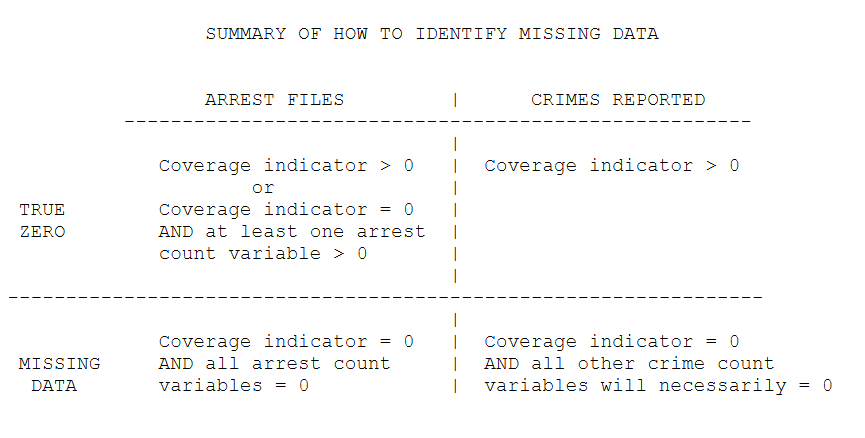

In [16]:
county_crime = county_crime.loc[(county_crime['COVIND'] != 0) & (county_crime['Total_arrests'] != 0)]

In [17]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(county_crime['arrest_rate'])
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [8860.71629668811, 8885.29886914378, 8892.568524535533, 8957.973517559009, 8969.771745835904, 8993.095865016096, 8995.908089392507, 9027.408784980518, 9068.424735971497, 9071.29234953994, 9087.110343482742, 9089.422251298198, 9173.476686970282, 9187.410434690304, 9236.624256903162, 9303.981871155715, 9318.976825535638, 9420.8084824387, 9466.329808801971, 9472.290696612801, 9475.155008296219, 9479.491282742358, 9539.639870018898, 9542.240881494547, 9652.410817136273, 9665.89809665898, 9709.27043335162, 9718.443400115426, 9755.751207043453, 9792.452830188678, 9827.900532341575, 9917.775266219425, 9949.24245315422, 9955.864264524998, 10006.448839208942, 10227.847659589315, 10294.97708467903, 10369.65249896165, 10401.171071372051, 10546.497978348767, 10580.155527644905, 10653.339834227207, 10691.131979097088, 10855.59265442404, 11149.739465056937, 11188.634508493024, 11211.332112644755, 11261.449663306705, 11369.215662206947, 11491.181186531267, 11518.17533856022

In [18]:
#drop outliers, we are using min(sample_outliers) because we only have outliers on the right of our distribution
county_crime = county_crime.loc[(county_crime['arrest_rate'] > 100) & (county_crime['arrest_rate'] < min(sample_outliers))]

In [19]:
county_crime.drop(['COVIND','Total_arrests'],axis=1,inplace=True)

In [20]:
county_crime.describe()

,population,white,black,bachelors,median_hh_income,over_65,poverty,unemployment_rate,metro,arrest_rate
count,2.761000e+03,2761.000000,2761.000000,2761.000000,2761.000000,2761.000000,2761.000000,2761.000000,2761.000000,2761.000000
mean,9.946465e+04,83.111554,8.648569,19.152336,44466.286128,15.768816,15.428504,9.357917,0.372329,3662.921248
std,3.228186e+05,16.310007,14.180204,8.802374,11718.733381,4.047696,6.218354,3.170297,0.483513,1770.669907
min,8.200000e+01,10.700000,0.000000,3.700000,19906.000000,3.500000,0.000000,2.180000,0.000000,107.104605
25%,1.198800e+04,75.400000,0.500000,13.200000,36956.000000,13.100000,11.000000,7.170000,0.000000,2360.322677
50%,2.683900e+04,89.200000,2.000000,16.900000,42491.000000,15.400000,14.700000,9.150000,0.000000,3461.207907
75%,6.729500e+04,95.400000,9.600000,22.700000,49246.000000,18.000000,18.900000,11.350000,1.000000,4826.579863
max,9.818605e+06,99.000000,85.700000,71.000000,115574.000000,34.000000,47.200000,28.840000,1.000000,8837.811590


<AxesSubplot:xlabel='poverty', ylabel='arrest_rate'>

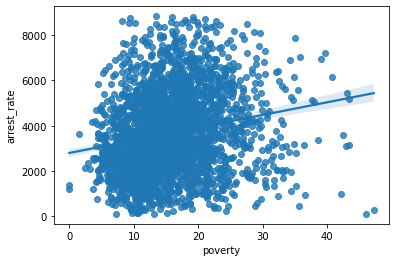

In [21]:
sns.regplot(x=county_crime['poverty'], y=county_crime['arrest_rate'])

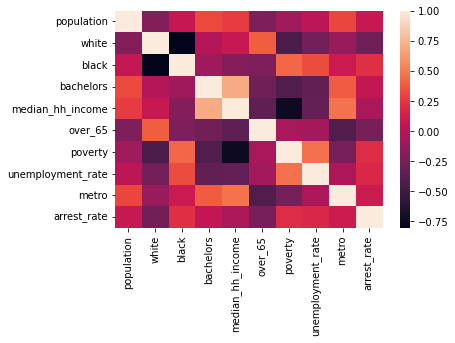

In [22]:
import seaborn as sn
corrMatrix = county_crime.corr()
sn.heatmap(corrMatrix)
plt.show()

In [23]:
y = county_crime.arrest_rate
x = county_crime.poverty
z = county_crime.black
w = county_crime.metro
results_fork_incorrect = smf.ols('y ~ x + z + w', data=county_crime).fit()
results_fork_incorrect.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     74.90
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           1.44e-46
Time:                        13:44:54   Log-Likelihood:                -24459.
No. Observations:                2761   AIC:                         4.893e+04
Df Residuals:                    2757   BIC:                         4.895e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2557.3444    102.804     24.876      0.000    2355.763    2758.926
x             50.9977      6.117      8.337      0.000      39.003      62.992
z             15.4354      2.603      5.930      0.000      10.331      20.540
w            497.5814     71.484      6.961      0.000     357.413     637.750
==============================================================================
Omnibus:                       69.848   Durbin-Watson:                   1.675
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.850
Skew:                           0.402   Prob(JB):                     5.58e-17
Kurtosis:                       2.948   Cond. No.                         73.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
def standardize(x):
    return (x-x.mean())/x.std()
arrest_rate = standardize(county_crime['arrest_rate'])
poverty = standardize(county_crime['poverty'])
black = standardize(county_crime['black'])
metro = standardize(county_crime['metro'])

In [25]:
with pm.Model() as normal:
    constant = pm.Normal('constant', mu = 0.0, sd = 1.0)
    σ_prior = 0.1
    b_poverty = pm.Normal('b_poverty', mu = 0, sd = σ_prior)
    b_black = pm.Normal('b_black', mu = 0, sd = σ_prior)
    
    μ = constant + b_poverty + b_black  
    σ = pm.HalfNormal('σ', 1)

    arrest_rate = pm.Normal('arrest_rate', μ, σ, observed=arrest_rate)
    trace_normal = pm.sample(1000, tune=650)

/tmp/ipykernel_10991/1452612954.py:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_normal = pm.sample(1000, tune=650)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, b_black, b_poverty, constant]


Sampling 4 chains for 650 tune and 1_000 draw iterations (2_600 + 4_000 draws total) took 73 seconds.
The acceptance probability does not match the target. It is 0.8796429651705334, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8824375039468975, but should be close to 0.8. Try to increase the number of tuning steps.


In [26]:
with normal:
    ppc_normal = pm.sample_posterior_predictive(trace_normal, var_names = ['arrest_rate'])

In [27]:
data_posterior_normal = az.from_pymc3(trace_normal, posterior_predictive = ppc_normal)

/opt/conda/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [28]:
variables_arrest = ['b_poverty','b_black']
az.summary(data_posterior_normal.posterior,variables_arrest)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
b_poverty,-0.002,0.100,-0.177,0.194,0.002,0.002,2398.0,2257.0,1.0
b_black,0.001,0.099,-0.181,0.191,0.002,0.002,2179.0,2065.0,1.0


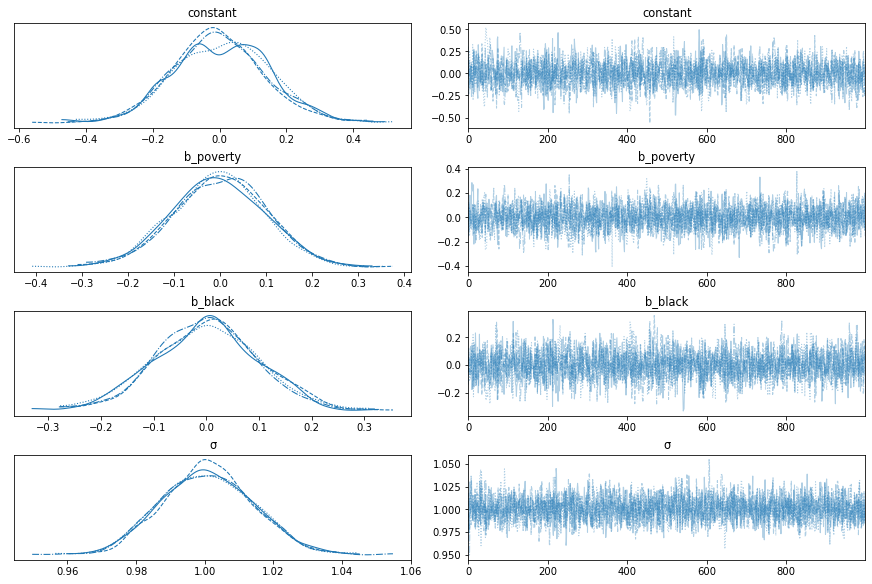

In [29]:
with normal:
    pm.plot_trace(trace_normal)

# Robustness analysis (0.5 points)

How robust are your results? Think of things like:

* outliers in the data
* different specification of regression, neural network etc.
* split of data in train, validation and test data.

In [30]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

# Discussion and conclusion (0.5 points)

What did you find in the analysis above; what is the answer to the question you started out with.

What are weaknesses of your approach that can be improved upon in future research (e.g. in your thesis).



YOUR ANSWER HERE